# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Reading the Data & Pre-Processing

In [2]:
data=pd.read_csv('walmart_final_reindexed.csv')
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace = True)
data

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown
Date,,,,,,,,,
2010-02-05,1,0,0.122377,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000
2010-02-05,1,0,0.057628,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000
2010-02-05,1,0,0.064927,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000
2010-02-05,1,0,0.000184,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000
2010-02-05,1,0,0.005329,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000
...,...,...,...,...,...,...,...,...,...
2012-10-26,45,0,0.108989,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609
2012-10-26,45,0,0.011048,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609
2012-10-26,45,0,0.017160,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609


In [3]:
data.isna().sum()

Store             0
IsHoliday         0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
Size              0
Total_Markdown    0
dtype: int64

In [4]:
stores_data = []
path = "store-reindexed-data"
print("--------------- Starting Execution -------------")
for i in range(1, 46):
    store = pd.read_csv(f"{path}/Store_{i}.csv")
    store["Date"] = pd.to_datetime(store["Date"])
    store = store.set_index("Date")
    print(f"Read: Store_{i}.csv")
    stores_data.append(store)
print("---------------- End of Execution -------------") 

--------------- Starting Execution -------------
Read: Store_1.csv
Read: Store_2.csv
Read: Store_3.csv
Read: Store_4.csv
Read: Store_5.csv
Read: Store_6.csv
Read: Store_7.csv
Read: Store_8.csv
Read: Store_9.csv
Read: Store_10.csv
Read: Store_11.csv
Read: Store_12.csv
Read: Store_13.csv
Read: Store_14.csv
Read: Store_15.csv
Read: Store_16.csv
Read: Store_17.csv
Read: Store_18.csv
Read: Store_19.csv
Read: Store_20.csv
Read: Store_21.csv
Read: Store_22.csv
Read: Store_23.csv
Read: Store_24.csv
Read: Store_25.csv
Read: Store_26.csv
Read: Store_27.csv
Read: Store_28.csv
Read: Store_29.csv
Read: Store_30.csv
Read: Store_31.csv
Read: Store_32.csv
Read: Store_33.csv
Read: Store_34.csv
Read: Store_35.csv
Read: Store_36.csv
Read: Store_37.csv
Read: Store_38.csv
Read: Store_39.csv
Read: Store_40.csv
Read: Store_41.csv
Read: Store_42.csv
Read: Store_43.csv
Read: Store_44.csv
Read: Store_45.csv
---------------- End of Execution -------------


In [5]:
len(stores_data)

45

In [6]:
stores_data[1]

,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown
Date,,,,,,,,,
2010-02-05,2,0,0.122774,0.118866,0.041637,0.837102,0.426011,0.906277,0.000000
2010-02-05,2,0,0.047011,0.118866,0.041637,0.837102,0.426011,0.906277,0.000000
2010-02-05,2,0,0.372250,0.118866,0.041637,0.837102,0.426011,0.906277,0.000000
2010-02-05,2,0,0.099715,0.118866,0.041637,0.837102,0.426011,0.906277,0.000000
2010-02-05,2,0,0.005580,0.118866,0.041637,0.837102,0.426011,0.906277,0.000000
...,...,...,...,...,...,...,...,...,...
2012-10-26,2,0,0.121919,0.609582,0.712132,0.958935,0.219571,0.906277,0.071815
2012-10-26,2,0,0.056237,0.609582,0.712132,0.958935,0.219571,0.906277,0.071815
2012-10-26,2,0,0.044036,0.609582,0.712132,0.958935,0.219571,0.906277,0.071815


# Define Elbow function for proper thresholding in DBSCAN's epsilon parameter

In [7]:
# Find Elbow Point, Trade off Point
def elbow_point(data):
    curve = data
    nPoints = len(curve)
    allCoord = np.vstack((range(nPoints), curve)).T
    np.array([range(nPoints), curve])
    
    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
    vecFromFirst = allCoord - firstPoint
    scalarProduct = np.sum(vecFromFirst * np.tile(lineVecNorm, (nPoints, 1)), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    idxOfBestPoint = np.argmax(distToLine)

    return idxOfBestPoint

In [8]:
def mad(x):
#     md = 1.4826*np.median(np.abs(x - np.median(x)))
    tmax = np.median(x) + 8*x[elbow_point(x)]
    return tmax

# DBSCAN

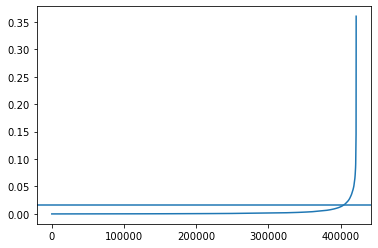

No. of outliers is 0.5368029034324074%


In [9]:
X = data.drop(["Store", "Size"], axis = 1)
neigh=NearestNeighbors(n_neighbors=23)
neigh_fit=neigh.fit(X)
distances,indices=neigh_fit.kneighbors(X)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
rad = mad(distances)
# Kudur
plt.plot(distances)
plt.axhline(distances[elbow_point(distances)])
plt.show()
# Hudur
dbscan = DBSCAN(eps = rad, min_samples=16, metric='euclidean')
db_model = dbscan.fit(X)
label = db_model.labels_
outlie = X[label == -1]
print(f'No. of outliers is {outlie.shape[0] /X.shape[0]*100}%')

In [10]:
outlie

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Total_Markdown
Date,,,,,,,
2010-02-12,1,0.702514,0.055289,0.024408,0.841941,0.405118,0.000000
2010-09-10,1,0.659760,0.769600,0.036612,0.844442,0.374545,0.000000
2010-09-10,1,0.613871,0.769600,0.036612,0.844442,0.374545,0.000000
2010-11-26,1,0.966318,0.517689,0.158650,0.846945,0.379433,0.000000
2010-11-26,1,0.839124,0.517689,0.158650,0.846945,0.379433,0.000000
...,...,...,...,...,...,...,...
2010-12-24,0,0.692631,0.110960,0.323336,0.558281,0.464347,0.000000
2011-11-25,1,0.348975,0.418392,0.580102,0.615668,0.445083,0.341565
2011-11-25,1,0.822570,0.418392,0.580102,0.615668,0.445083,0.341565


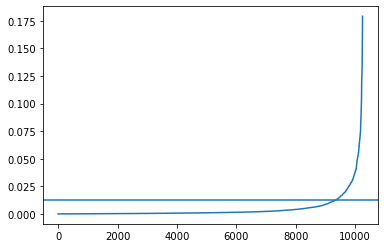

No. of outliers in store 1 is 3.1237797735259663%
No. of Outliers in store 1 is 320


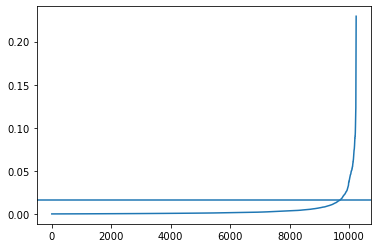

No. of outliers in store 2 is 1.2111740574330925%
No. of Outliers in store 2 is 124


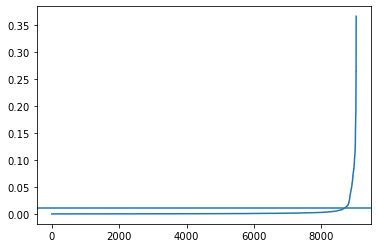

No. of outliers in store 3 is 1.7485613103142985%
No. of Outliers in store 3 is 158


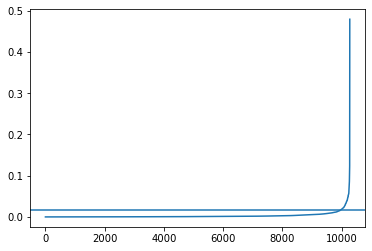

No. of outliers in store 4 is 0.6522585669781932%
No. of Outliers in store 4 is 67


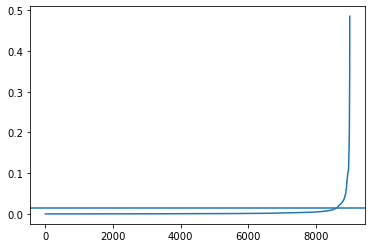

No. of outliers in store 5 is 1.4890543393710411%
No. of Outliers in store 5 is 134


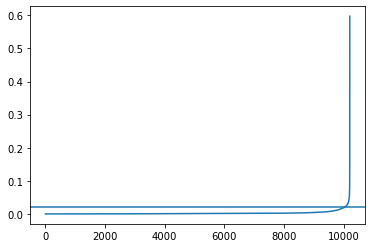

No. of outliers in store 6 is 0.05876016061110567%
No. of Outliers in store 6 is 6


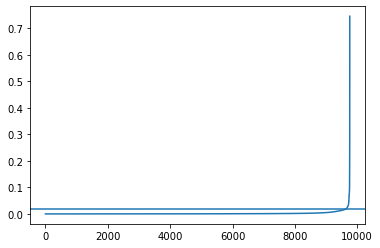

No. of outliers in store 7 is 0.04097520999795124%
No. of Outliers in store 7 is 4


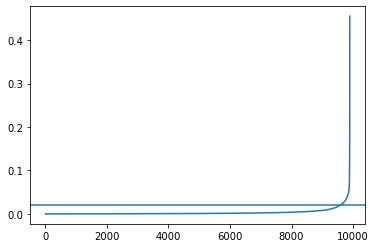

No. of outliers in store 8 is 0.15159171298635674%
No. of Outliers in store 8 is 15


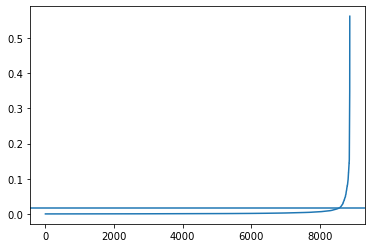

No. of outliers in store 9 is 1.1841660087966617%
No. of Outliers in store 9 is 105


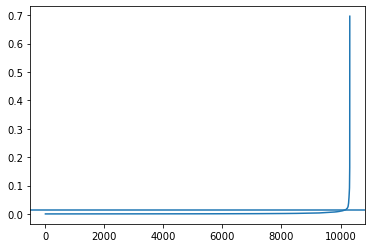

No. of outliers in store 10 is 0.1454192922927775%
No. of Outliers in store 10 is 15


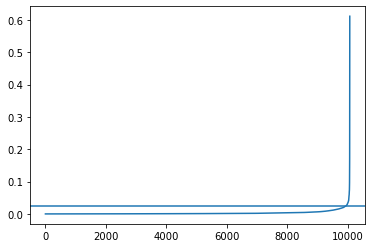

No. of outliers in store 11 is 0.04969191015702643%
No. of Outliers in store 11 is 5


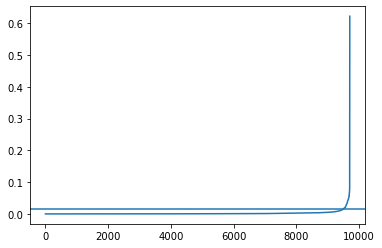

No. of outliers in store 12 is 0.04121586810922205%
No. of Outliers in store 12 is 4


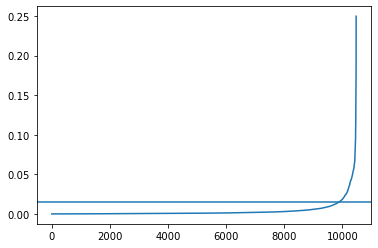

No. of outliers in store 13 is 1.0120297880465916%
No. of Outliers in store 13 is 106


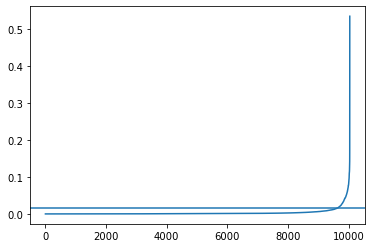

No. of outliers in store 14 is 0.2888446215139442%
No. of Outliers in store 14 is 29


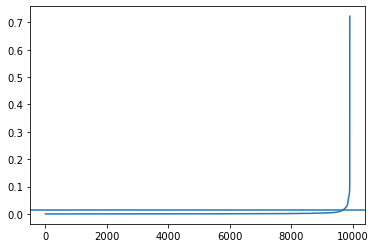

No. of outliers in store 15 is 0.16159983840016162%
No. of Outliers in store 15 is 16


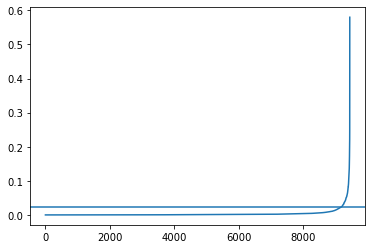

No. of outliers in store 16 is 0.16943767870380175%
No. of Outliers in store 16 is 16


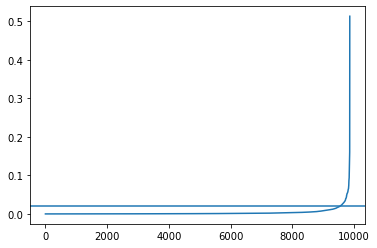

No. of outliers in store 17 is 0.11151662611516627%
No. of Outliers in store 17 is 11


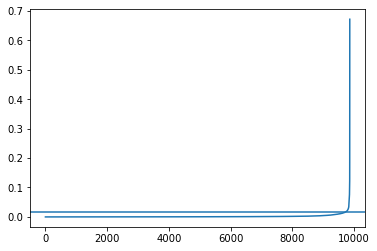

No. of outliers in store 18 is 0.06085809919870169%
No. of Outliers in store 18 is 6


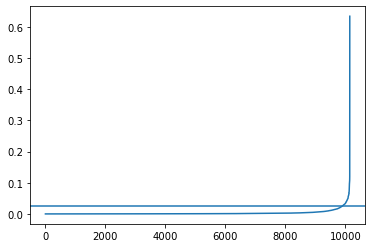

No. of outliers in store 19 is 0.019708316909735908%
No. of Outliers in store 19 is 2


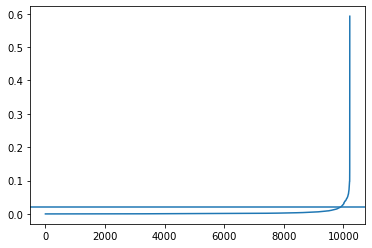

No. of outliers in store 20 is 0.11748580379870766%
No. of Outliers in store 20 is 12


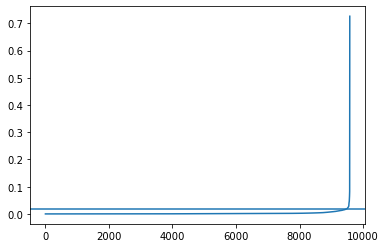

No. of outliers in store 21 is 0.06261740763932373%
No. of Outliers in store 21 is 6


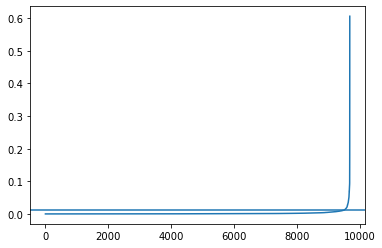

No. of outliers in store 22 is 0.09289843104872006%
No. of Outliers in store 22 is 9


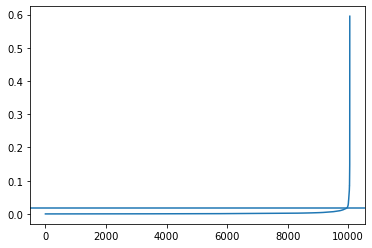

No. of outliers in store 23 is 0.10945273631840796%
No. of Outliers in store 23 is 11


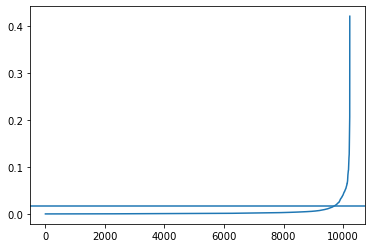

No. of outliers in store 24 is 0.576847868596011%
No. of Outliers in store 24 is 59


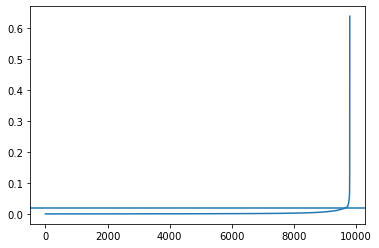

No. of outliers in store 25 is 0.04079967360261118%
No. of Outliers in store 25 is 4


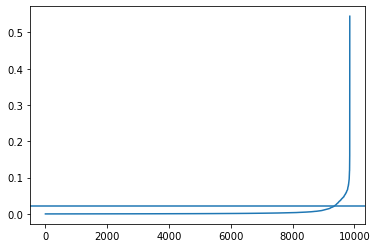

No. of outliers in store 26 is 0.3247412218388472%
No. of Outliers in store 26 is 32


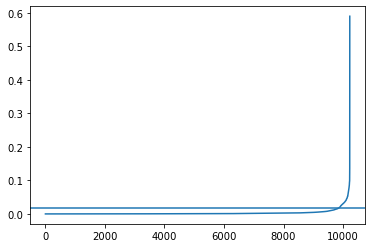

No. of outliers in store 27 is 0.08801955990220049%
No. of Outliers in store 27 is 9


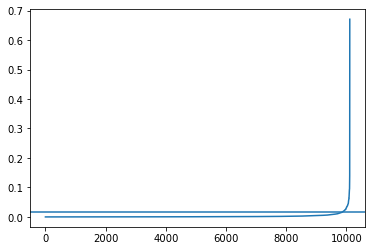

No. of outliers in store 28 is 0.21754177790962126%
No. of Outliers in store 28 is 22


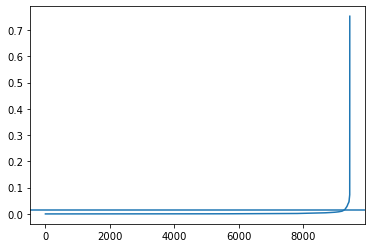

No. of outliers in store 29 is 0.052882072977260705%
No. of Outliers in store 29 is 5


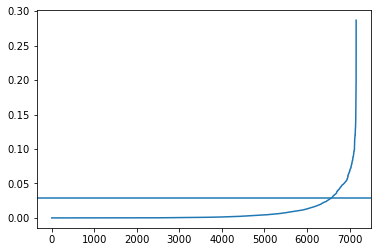

No. of outliers in store 30 is 0.4471771939631079%
No. of Outliers in store 30 is 32


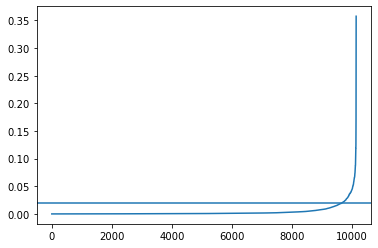

No. of outliers in store 31 is 0.21691973969631237%
No. of Outliers in store 31 is 22


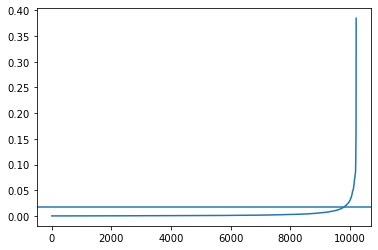

No. of outliers in store 32 is 0.42148598314056074%
No. of Outliers in store 32 is 43


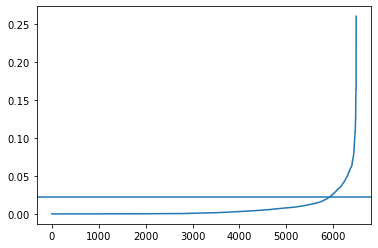

No. of outliers in store 33 is 0.5857869585324496%
No. of Outliers in store 33 is 38


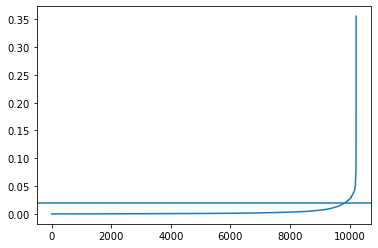

No. of outliers in store 34 is 0.14671361502347416%
No. of Outliers in store 34 is 15


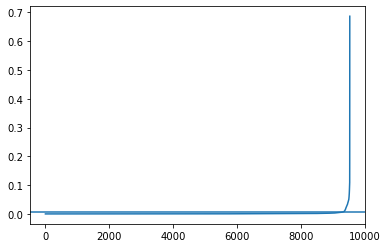

No. of outliers in store 35 is 0.3568429890848027%
No. of Outliers in store 35 is 34


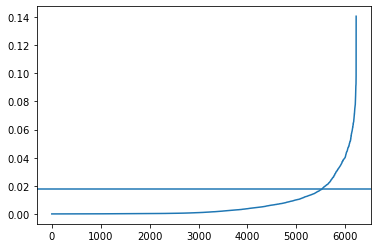

No. of outliers in store 36 is 1.9286403085824495%
No. of Outliers in store 36 is 120


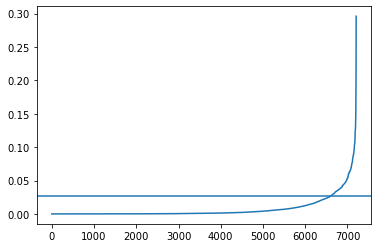

No. of outliers in store 37 is 0.38856508465167916%
No. of Outliers in store 37 is 28


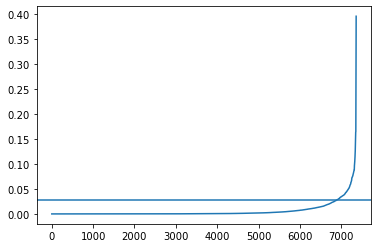

No. of outliers in store 38 is 0.28524857375713125%
No. of Outliers in store 38 is 21


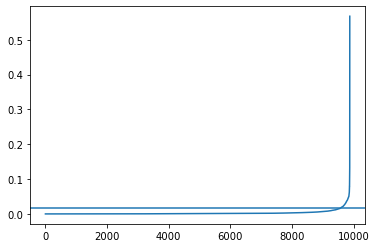

No. of outliers in store 39 is 0.10123506782749545%
No. of Outliers in store 39 is 10


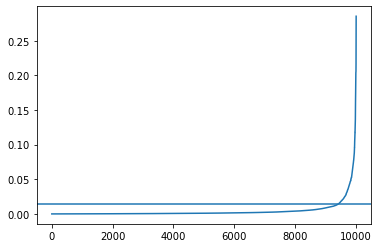

No. of outliers in store 40 is 1.9367075970849554%
No. of Outliers in store 40 is 194


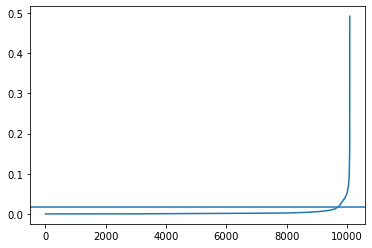

No. of outliers in store 41 is 0.32712133227597145%
No. of Outliers in store 41 is 33


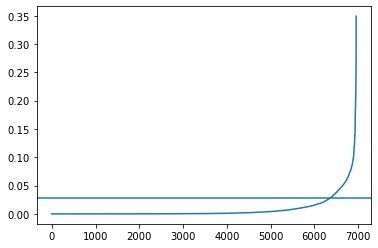

No. of outliers in store 42 is 0.5033798360419963%
No. of Outliers in store 42 is 35


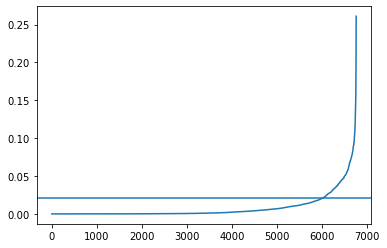

No. of outliers in store 43 is 1.7034513405421419%
No. of Outliers in store 43 is 115


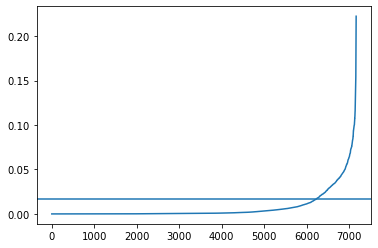

No. of outliers in store 44 is 2.7758404240479844%
No. of Outliers in store 44 is 199


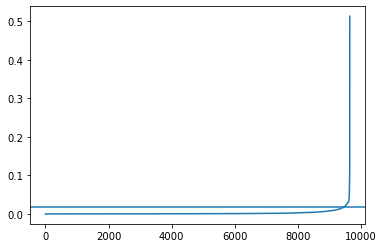

No. of outliers in store 45 is 0.062260039431358306%
No. of Outliers in store 45 is 6

 No. of total outliers 2257
Exucution End


In [11]:
k = 0
total_outliers = 0
labels = []
outliers = []
for df in stores_data:
    k += 1
    X = df.drop([ "Store", "Size"], axis = 1)
    # Budur
    neigh=NearestNeighbors(n_neighbors=23)
    neigh_fit=neigh.fit(X)
    distances,indices=neigh_fit.kneighbors(X)
    distances=np.sort(distances,axis=0)
    distances=distances[:,1]
    rad = mad(distances)
    # Kudur
    plt.plot(distances)
    plt.axhline(distances[elbow_point(distances)])
    plt.show()
    # Hudur
    dbscan = DBSCAN(eps = rad, min_samples=13, metric='euclidean')
    db_model = dbscan.fit(X)
    label = db_model.labels_
    labels.append(label)
    outliers.append(X[label == -1])
    total_outliers += X[label == -1].shape[0]
    print(f'No. of outliers in store {k} is {sum(label == -1)/X.shape[0]*100}%')
    print(f"No. of Outliers in store {k} is {sum(label == -1)}")
print(f"\n No. of total outliers {total_outliers}")
print("Exucution End")

# Comparison

In [20]:
outlie

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Total_Markdown
Date,,,,,,,
2010-02-12,1,0.702514,0.055289,0.024408,0.841941,0.405118,0.000000
2010-09-10,1,0.659760,0.769600,0.036612,0.844442,0.374545,0.000000
2010-09-10,1,0.613871,0.769600,0.036612,0.844442,0.374545,0.000000
2010-11-26,1,0.966318,0.517689,0.158650,0.846945,0.379433,0.000000
2010-11-26,1,0.839124,0.517689,0.158650,0.846945,0.379433,0.000000
...,...,...,...,...,...,...,...
2010-12-24,0,0.692631,0.110960,0.323336,0.558281,0.464347,0.000000
2011-11-25,1,0.348975,0.418392,0.580102,0.615668,0.445083,0.341565
2011-11-25,1,0.822570,0.418392,0.580102,0.615668,0.445083,0.341565


In [26]:
outlie.to_csv('DBSCAN_whole_anomaly.csv')

In [11]:
len(outliers)

45

In [21]:
total_outliers = pd.concat(outliers)
total_outliers

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Total_Markdown
Date,,,,,,,
2010-02-05,0,0.567408,0.122844,0.041637,0.840500,0.405118,0.000000
2010-02-05,0,0.523837,0.122844,0.041637,0.840500,0.405118,0.000000
2010-02-05,0,0.483620,0.122844,0.041637,0.840500,0.405118,0.000000
2010-02-05,0,0.686820,0.122844,0.041637,0.840500,0.405118,0.000000
2010-02-12,1,0.344684,0.055289,0.024408,0.841941,0.405118,0.000000
...,...,...,...,...,...,...,...
2010-12-24,0,0.566118,0.110960,0.323336,0.558281,0.464347,0.000000
2010-12-24,0,0.692631,0.110960,0.323336,0.558281,0.464347,0.000000
2011-11-25,1,0.822570,0.418392,0.580102,0.615668,0.445083,0.341565


In [25]:
total_outliers.to_csv('DBSCAN_store_anomaly.csv')

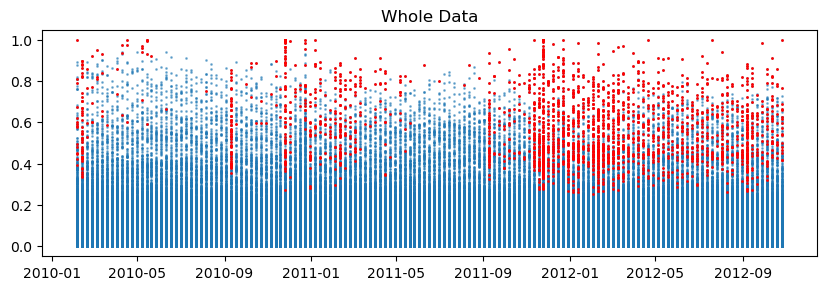

In [33]:
plt.figure(figsize = (10, 3), dpi = 100)
plt.scatter(data.index, data["Weekly_Sales"], s= 1, alpha = 0.5)
plt.scatter(outlie.index, outlie["Weekly_Sales"],c = "red", s= 1)
plt.title("Whole Data")
plt.savefig('Whole data anomaly img.png')

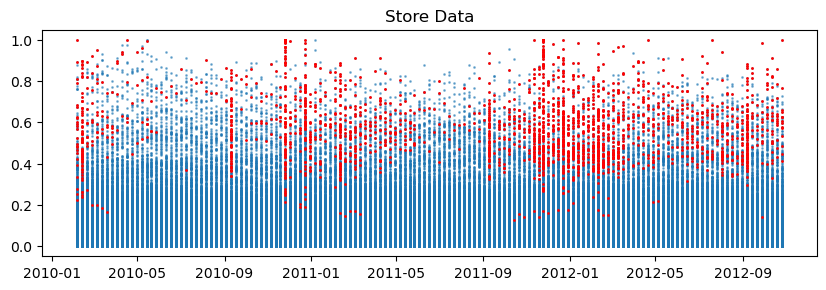

In [34]:
plt.figure(figsize = (10, 3), dpi = 100)
plt.scatter(data.index, data["Weekly_Sales"], s= 1, alpha = 0.5)
plt.scatter(total_outliers.index, total_outliers["Weekly_Sales"],c = "red", s= 1)
plt.title("Store Data")
plt.savefig('store data anomaly img.png')

Text(0.5, 1.0, 'Global and Local Anomaly Comparison (DBSCAN)')

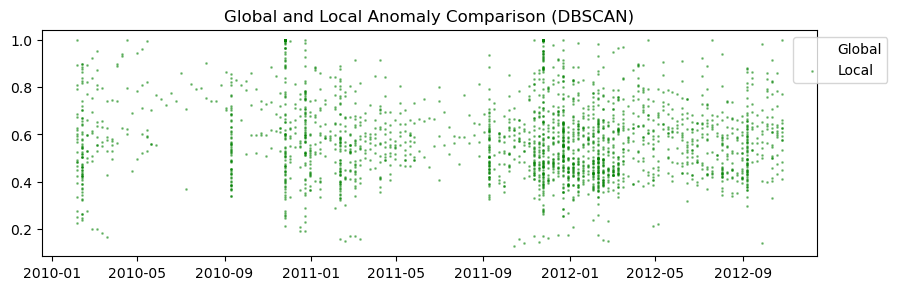

In [32]:
plt.figure(figsize = (10, 3), dpi = 100)
plt.scatter(outlie.index, outlie["Weekly_Sales"],c = "red", s= 1, alpha= 0., label = "Global")
plt.scatter(total_outliers.index, total_outliers["Weekly_Sales"],c = "green", s= 1, label = "Local", alpha = 0.4)
plt.legend(bbox_to_anchor = [0.96, 1])
plt.title("Global and Local Anomaly Comparison (DBSCAN)")